# Обнаружение пожаров по фото и видео
### определение оптимальной скорости обучения

In [1]:
import matplotlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import argparse

import sys

In [2]:
import cv2

In [3]:
from imutils import paths

In [4]:
import os

## Подготовка данных

In [5]:
FIRE_PATH = "C:/Users/Marinka/Desktop/pract/fire-detection/fire"
NO_FIRE_PATH = "C:/Users/Marinka/Desktop/pract/fire-detection/nofire"

In [6]:
# инициализировать метки классов в наборе данных
CLASSES_NAMES = ["NoFire", "Fire"]

# начальная скорость обучения
SPEED = 1e-10 #0.01 = 1e-2

In [7]:
# функция, которая принимает путь к набору данных
def load_dataset(datasetPath):
    # путь к изображениям
    imagePaths = list(paths.list_images(datasetPath))
    data = []

    for imagePath in imagePaths:
        # загрузка изображений и изменение их размеров до 128x128 пикселей, 
        # игнорируя соотношение сторон
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (224, 224))

        # добавить изображение в список data
        data.append(image)

    # array возвращает список data  в формате массива NumPy
    return np.array(data, dtype="float32")

In [ ]:
import numpy as np
# загрузка изображений с огнем и без огня
fireData = load_dataset(FIRE_PATH)
noFireData = load_dataset(NO_FIRE_PATH)

# конструирование меток для классов, 1 - пожар, 0 -нет пожара
fireLabels = np.ones((fireData.shape[0],))
noFireLabels = np.zeros((noFireData.shape[0],))

# функция vstack() соединяет массивы по вертикали
data = np.vstack([fireData, noFireData])
# функция hstack() соединяет массивы по горизонтали
labels = np.hstack([fireLabels, noFireLabels])

# масштабировать интенсивность пикселей до диапазона [0, 1]
data /= 255

In [ ]:
# преобразование правильных ответов в формат one hot encoding
labels = to_categorical(labels, num_classes=2)

In [ ]:
# создание баланса
classTotal= labels.sum(axis=0) # cуммируются значения по оси 0 (по столбцам)
classWeight = classTotal.max() / classTotal

In [ ]:
# размер выборки валидации
VAL_SIZE = 0.2

In [ ]:
# разделение на выборку для обучения и выборку для валидации
#x_train -изображения, y_train -метки для обозначения класса
(x_train, x_val, y_train, y_val) = train_test_split(data, labels,
    test_size=VAL_SIZE, 
    random_state=42
  )

## Создание нейронной сети

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
# DCNN
model = Sequential()
inputShape = (128, 128, 3)
chanDim = -1

# CONV -> CONV -> CONV ->POOL
# Первый сверточный слой
model.add(Conv2D(8, (3, 3), padding="same", 
     input_shape=inputShape))
model.add(Activation("relu"))
# Пакетная нормализация 
model.add(BatchNormalization(axis=chanDim)) 
# Второй сверточный слой
model.add(Conv2D(8, (3, 3), padding="same"))
model.add(Activation("relu"))
# Пакетная нормализация 
model.add(BatchNormalization(axis=chanDim)) 
# Третий сверточный слой
model.add(Conv2D(8, (3, 3), padding="same"))
model.add(Activation("relu"))
# Пакетная нормализация 
model.add(BatchNormalization(axis=chanDim)) 
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))


# CONV -> CONV -> POOL
# Четвертый сверточный слой
model.add(Conv2D(16, (3, 3), padding="same")) 
model.add(Activation("relu"))
#Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Пятый сверточный слой
model.add(Conv2D(16, (3, 3), padding="same")) 
model.add(Activation("relu"))
#Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV -> CONV -> POOL
# Шестой сверточный слой
model.add(Conv2D(32, (3, 3), padding="same")) 
model.add(Activation("relu"))
#Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Седьмой сверточный слой
model.add(Conv2D(32, (3, 3), padding="same")) 
model.add(Activation("relu"))
#Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV -> CONV -> POOL
# Восьмой сверточный слой
model.add(Conv2D(64, (3, 3), padding="same")) 
model.add(Activation("relu"))
#Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Девятый сверточный слой
model.add(Conv2D(64, (3, 3), padding="same")) 
model.add(Activation("relu"))
#Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Четвертый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV -> CONV -> POOL
# Десятый сверточный слой
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
# Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Одиннадцатый сверточный слой
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
# Пакетная нормализация
model.add(BatchNormalization(axis=chanDim))
# Пятый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

# СLASSIFIER
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Первый полносвязный слой для классификации
model.add(Dense(256))
model.add(Activation("relu"))
# Пакетная нормализация
model.add(BatchNormalization())
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Второй полносвязный слой
model.add(Dense(256))
model.add(Activation("relu"))
# Пакетная нормализация
model.add(BatchNormalization())
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной слой
model.add(Dense(2))
model.add(Activation("softmax"))

In [ ]:
EPOCHS = 55
BATCH_SIZE = 64 #Размер минивыборки, те изменяем веса нейронных сетей после того, как обрабатываем каждые 64 объекта

In [ ]:
# дополнительные обучающие данные
datagen = ImageDataGenerator(
    rotation_range=25,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="reflect")


# сеть задана, нужно ее скомпилировать
model.compile(loss="binary_crossentropy", 
              optimizer=SGD(lr=SPEED, momentum=0.9, decay= SPEED / EPOCHS),
              metrics=["accuracy"])

In [17]:
# # информация о сети
# print(model.summary())

## Скорость обучения, определение оптимальной

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import tempfile

class LearningRateFinder:
    def __init__(self, model, stopFactor=4, beta=0.98):
        self.model = model
        self.stopFactor = stopFactor
        self.beta = beta
        self.lrs = []
        self.losses = []
        self.lrMult = 1
        self.avgLoss = 0
        self.bestLoss = 1e9
        self.batchNum = 0
        self.weightsFile = None

    def reset(self):
        self.lrs = []
        self.losses = []
        self.lrMult = 1
        self.avgLoss = 0
        self.bestLoss = 1e9
        self.batchNum = 0
        self.weightsFile = None

    def is_data_iter(self, data):
        iterClasses = ["NumpyArrayIterator", "DirectoryIterator",
             "DataFrameIterator", "Iterator", "Sequence"]

        return data.__class__.__name__ in iterClasses

    def on_batch_end(self, batch, logs):
        lr = K.get_value(self.model.optimizer.lr)
        self.lrs.append(lr)
        l = logs["loss"]
        self.batchNum += 1
        self.avgLoss = (self.beta * self.avgLoss) + ((1 - self.beta) * l)
        smooth = self.avgLoss / (1 - (self.beta ** self.batchNum))
        self.losses.append(smooth)
        stopLoss = self.stopFactor * self.bestLoss
        if self.batchNum > 1 and smooth > stopLoss:
            self.model.stop_training = True
            return
        if self.batchNum == 1 or smooth < self.bestLoss:
            self.bestLoss = smooth

        lr *= self.lrMult
        K.set_value(self.model.optimizer.lr, lr)

    def find(self, trainData, startLR, endLR, epochs=None,
        stepsPerEpoch=None, batchSize=32, sampleSize=2048,
        classWeight=None, verbose=1):

        self.reset()

        useGen = self.is_data_iter(trainData)

        if useGen and stepsPerEpoch is None:
            msg = "Using generator without supplying stepsPerEpoch"
            raise Exception(msg)

        elif not useGen:
            numSamples = len(trainData[0])
            stepsPerEpoch = np.ceil(numSamples / float(batchSize))

        if epochs is None:
            epochs = int(np.ceil(sampleSize / float(stepsPerEpoch)))

        numBatchUpdates = epochs * stepsPerEpoch

        self.lrMult = (endLR / startLR) ** (1.0 / numBatchUpdates)

        self.weightsFile = tempfile.mkstemp()[1]
        self.model.save_weights(self.weightsFile)

        origLR = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, startLR)

        callback = LambdaCallback(on_batch_end=lambda batch, logs:
            self.on_batch_end(batch, logs))

        if useGen:
            self.model.fit(
                trainData,
                steps_per_epoch=stepsPerEpoch,
                epochs=epochs,
                class_weight=classWeight,
                verbose=verbose,
                callbacks=[callback])

        else:
            self.model.fit(
                trainData[0], trainData[1],
                batch_size=batchSize,
                epochs=epochs,
                class_weight=classWeight,
                callbacks=[callback],
                verbose=verbose)

        self.model.load_weights(self.weightsFile)
        K.set_value(self.model.optimizer.lr, origLR)

    def plot_loss(self, skipBegin=10, skipEnd=1, title=""):
        lrs = self.lrs[skipBegin:-skipEnd]
        losses = self.losses[skipBegin:-skipEnd]
        plt.plot(lrs, losses)
        plt.xscale("log")
        plt.xlabel("Learning Rate")
        plt.ylabel("Loss")
        if title != "":
            plt.title(title)


In [19]:
lrf = LearningRateFinder(model)
lrf.find(
    datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
    1e-10, 1e+1,
    stepsPerEpoch=np.ceil((x_train.shape[0] / float(BATCH_SIZE))),
    epochs=20,
    batchSize=BATCH_SIZE,
    classWeight=classWeight,
    verbose=1)

  ...
    to  
  ['...']
Train for 52.0 steps
Epoch 1/20
52/52 [==============================] - 135s 3s/step - loss: 1.3640 - accuracy: 0.4784
Epoch 2/20
52/52 [==============================] - 128s 2s/step - loss: 1.4216 - accuracy: 0.4808
Epoch 3/20
52/52 [==============================] - 127s 2s/step - loss: 1.4199 - accuracy: 0.4715
Epoch 4/20
52/52 [==============================] - 128s 2s/step - loss: 1.4068 - accuracy: 0.4709
Epoch 5/20
52/52 [==============================] - 128s 2s/step - loss: 1.4031 - accuracy: 0.4700
Epoch 6/20
52/52 [==============================] - 128s 2s/step - loss: 1.3269 - accuracy: 0.4946
Epoch 7/20
52/52 [==============================] - 127s 2s/step - loss: 1.3278 - accuracy: 0.4775
Epoch 8/20
52/52 [==============================] - 128s 2s/step - loss: 1.2988 - accuracy: 0.4940
Epoch 9/20
52/52 [==============================] - 127s 2s/step - loss: 1.1382 - accuracy: 0.5391
Epoch 10/20
52/52 [==============================] - 128s 2s/st

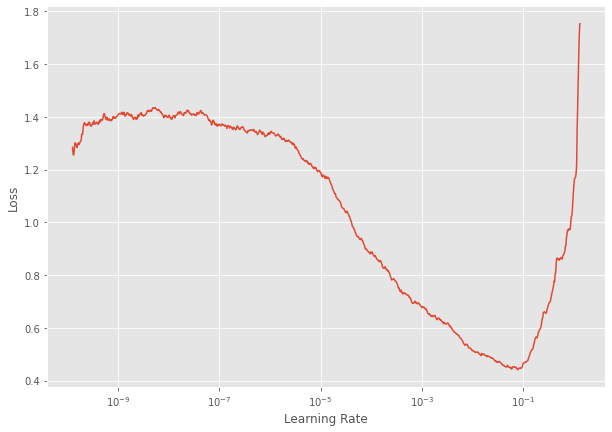

In [20]:
plt.style.use("ggplot") 
plt.figure(figsize=(10,7))
lrf.plot_loss()


In [ ]:
#по графику видно, что нам подойдет скорость 10^-2 лучше всего